In [81]:
import seaborn as sns
import numpy as np
import re
import pandas as pd

In [82]:
fasta = open ('RedA_0201_sequences.fa', 'r').read()

In [83]:
fasta = re.split('^>', fasta, flags=re.M) #split file on the carat for fasta. re.M flag means that the file has multiple lines. Every beginning of the line is a new thing; otherwise hat will only match first entry and it'll be ONE massive file.
fasta.pop(0) #removes first element, which wouldn't be populated
#THIS ISN'T WORKING, maybe?

''

In [94]:
#traverse list to separate header from aa
all_headers = []
all_sequences = []
seq_length = []
for block in fasta:
    block = block.strip().split('\n')  #puts headers and fasta aa on different lines
    header = block[0]
    sequence = ''.join(block[1:])
    
    all_headers.append(header)
    all_sequences.append(sequence)
    seq_length.append(len(sequence))

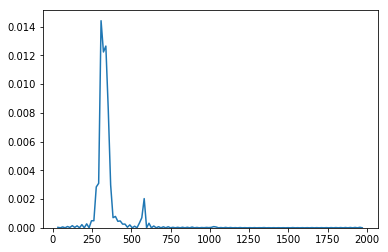

In [95]:
sns.kdeplot(seq_length) #distribution of lengths of sequences


In [96]:
seq_length = np.asarray(seq_length)
all_sequences = np.asarray(all_sequences)
all_headers = np.asarray(all_headers)

In [97]:
edited_sequences = all_sequences[(seq_length >= 200) & (seq_length <= 500)]
all_headers[ (seq_length >= 200) & (seq_length <= 500)]

array(['KZL84460.1 cyanide hydratase [Colletotrichum incanum] >OHW97723.1 cyanide hydratase [Colletotrichum incanum]',
       'KZL78593.1 cyanide hydratase [Colletotrichum tofieldiae]',
       'OLN83082.1 Cyanide hydratase [Colletotrichum chlorophyti]', ...,
       'GBC17240.1 nitrilase-like protein [Rhizophagus irregularis DAOM 181602=DAOM 197198]',
       'WP_021408662.1 carbon-nitrogen hydrolase [Clostridioides difficile] >EQH98189.1 carbon-nitrogen hydrolase family protein [Clostridioides difficile F314] >CCL36413.1 Putative nitrilase/cyanide hydratase and apolipoprotein N-acyltransferase [Clostridioides difficile T23] >OMK14183.1 hypothetical protein BER27_002887 [Clostridioides difficile] >PBE52121.1 carbon-nitrogen hydrolase [Clostridioides difficile] >PBE68583.1 carbon-nitrogen hydrolase [Clostridioides difficile] >PBE95302.1 carbon-nitrogen hydrolase [Clostridioides difficile] >PBF12848.1 carbon-nitrogen hydrolase [Clostridioides difficile]',
       'WP_069942830.1 hydratase [

In [98]:
re.findall('\[([^\s[\]]+)', all_headers[1])

['Colletotrichum', 'Colletotrichum']

In [99]:
out = open('RedA_0201_lengthfiltered.txt','w')
not_genera = set('Proteobacteria bacterium Type-E Type-D Betaproteobacteria'.split()) #gets rid of any unwanted "fake genera" names by splitting into their own set
found_genera = set() #builds your final set of wanted species FASTA entries
for header, sequence in zip(all_headers, edited_sequences):
    genus = re.findall('\[([^\s[\]]+)', header) #for each genus name, which is the FIRST entry in the header string...
    if found_genera.intersection(genus): #if this is a genus you've already found, ignore
        continue
    if not_genera.issuperset(genus): #if this is a genus name that is a "fake" name, ignore
        continue
    found_genera.update(genus) #if not, it's a new genus--keep the header and sequence
    out.write('>%s\n%s\n' % (header, sequence) ) #encodes the "wrong" line below. string, line break, string, then IDs which strings of data
    #out.write('>'+header+'\n'+sequence+'\n')
out.close() #provides the HIT IDs that we just recruited, which we can now use as a file transfer to the cluster to get the appropriate FASTA data from NCBI nr db

In [100]:
len(found_genera)

1174

In [101]:
found_genera

{'Amborella',
 'Cohnella',
 'Serpula',
 'Pseudomassariella',
 'Acuticoccus',
 'Sphaerotilus',
 'Microsporum',
 'Eilatimonas',
 'Acidovorax',
 'Obba',
 'Valsa',
 'Auricularia',
 'Capronia',
 'Pararhizobium',
 'Rhodohalobacter',
 'Phaeoacremonium',
 'Xanthophyllomyces',
 'Saitoella',
 'Gymnopus',
 'Glaciecola',
 'Grosmannia',
 'Rhynchosporium',
 'Lokiarchaeum',
 'Armillaria',
 'Sandarakinorhabdus',
 'Lentibacillus',
 'Picea',
 'Calidifontibacter',
 'Anaerotruncus',
 'Eutrema',
 'Rhodanobacter',
 'Marinibacterium',
 'Granulosicoccus',
 'Nocardia',
 'Osedax',
 'Microbulbifer',
 'Syntrophobotulus',
 'Methylomarinum',
 'Halobacteriovorax',
 'Aquilegia',
 'Syntrophus',
 'Zygosaccharomyces',
 'Halomonas',
 'Desulfobacterium',
 'Phaeomoniella',
 'Candida',
 'Planifilum',
 'Geobacillus',
 'Sulfitobacter',
 'Cyanobacteria',
 'Dendrobium',
 'Zavarzinella',
 'Zea',
 'Rhodotorula',
 'Ophiocordyceps',
 'Lomentospora',
 'Raoultibacter',
 'Caloramator',
 'Hyphomicrobium',
 'Exserohilum',
 'Gemmata',
 '